In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/content/sample_data/mnist_test.csv')

In [3]:
df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data = np.array(df)

In [42]:
m, n = data.shape

In [43]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [44]:
Y_train

array([5, 7, 5, ..., 6, 7, 0])

In [45]:
X_train[:,0].shape

(784,)

Our NN will have a simple two-layer architecture. Input layer  𝑎[0]  will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer  𝑎[1]  will have 10 units with ReLU activation, and finally our output layer  𝑎[2]  will have 10 units corresponding to the ten digit classes with softmax activation.

In [46]:
def init__params():
  W1 = np.random.rand(10,784) -0.5
  B1 = np.random.rand(10,1) -0.5
  W2 = np.random.rand(10,10) -0.5
  B2 = np.random.rand(10,1) -0.5
  return W1,B1,W2,B2

def ReLU(Z):
  return np.maximum(Z,0)

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(W1,B1,W2,B2,X):
  Z1 = W1.dot(X) + B1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + B2
  A2 = softmax(Z2)
  return Z1,A1,Z2,A2

def ReLU_deriv(Z):
  return Z>0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m * dZ2.dot(A1.T)
  dB2 = 1/m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  dB1 = 1/m * np.sum(dZ1)
  return dW1,dB1,dW2,dB2

def update_params(W1,B1,W2,B2,dW1,dB1,dW2,dB2,alpha):
  W1 = W1 - alpha * dW1
  B1 = B1 - alpha * dB1
  W2 = W2 - alpha * dW2
  B2 = B2 - alpha * dB2

In [47]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init__params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [48]:
def update_params(W1,B1,W2,B2,dW1,dB1,dW2,dB2,alpha):
  W1 = W1 - alpha * dW1
  B1 = B1 - alpha * dB1
  W2 = W2 - alpha * dW2
  B2 = B2 - alpha * dB2
  return W1, B1, W2, B2 # Return the updated parameters

In [49]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 2 5 ... 2 5 9] [5 7 5 ... 6 7 0]
0.10623402600288921
Iteration:  10
[4 2 3 ... 3 5 0] [5 7 5 ... 6 7 0]
0.2129125458384265
Iteration:  20
[4 2 3 ... 3 5 0] [5 7 5 ... 6 7 0]
0.31370152239137683
Iteration:  30
[8 2 3 ... 3 5 0] [5 7 5 ... 6 7 0]
0.38282031336815203
Iteration:  40
[8 2 3 ... 3 5 0] [5 7 5 ... 6 7 0]
0.44216024002666965
Iteration:  50
[8 7 3 ... 3 5 0] [5 7 5 ... 6 7 0]
0.49216579619957773
Iteration:  60
[8 7 3 ... 3 5 0] [5 7 5 ... 6 7 0]
0.5409489943327036
Iteration:  70
[8 7 3 ... 3 5 0] [5 7 5 ... 6 7 0]
0.5829536615179465
Iteration:  80
[8 7 3 ... 3 7 0] [5 7 5 ... 6 7 0]
0.616957439715524
Iteration:  90
[8 7 3 ... 3 7 0] [5 7 5 ... 6 7 0]
0.6490721191243471
Iteration:  100
[8 7 2 ... 3 7 0] [5 7 5 ... 6 7 0]
0.6761862429158796
Iteration:  110
[8 7 2 ... 3 7 0] [5 7 5 ... 6 7 0]
0.7008556506278475
Iteration:  120
[8 7 2 ... 3 7 0] [5 7 5 ... 6 7 0]
0.7188576508500945
Iteration:  130
[8 7 2 ... 3 7 0] [5 7 5 ... 6 7 0]
0.7360817868652072
Iteration:  1

85% accuracy on training the set

In [50]:
def make_predictiopns(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = get_predictions(A2)
  return predictions

def test_prediction(index, W1, b1, W2, b2):
  current_image = X_train[:, index, None]
  prediction = make_predictiopns(X_train[:, index, None], W1, b1, W2, b2)
  label = Y_train[index]
  print("Prediction: ", prediction)
  print("Label: ", label)
  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

let's look at a couple of examples

Prediction:  [8]
Label:  5


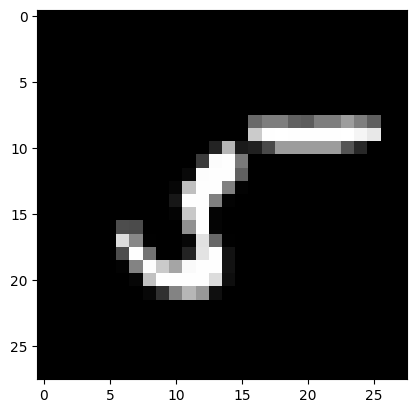

Prediction:  [7]
Label:  7


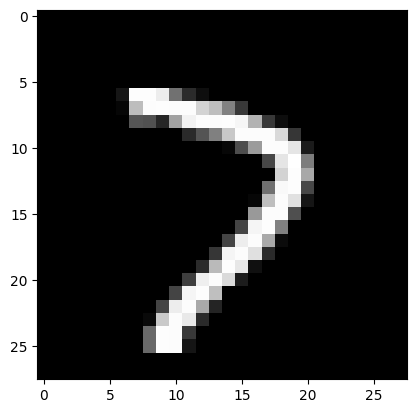

Prediction:  [2]
Label:  5


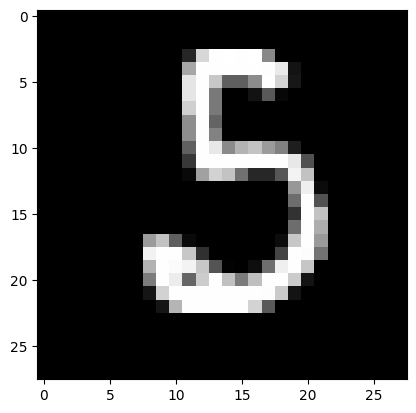

Prediction:  [2]
Label:  2


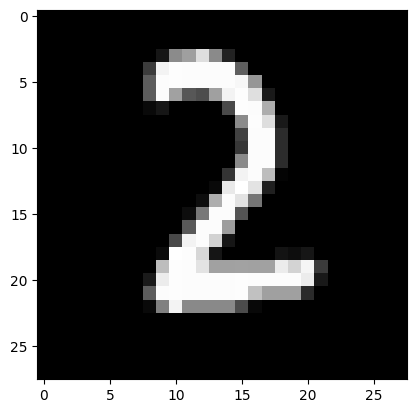

Prediction:  [3]
Label:  3


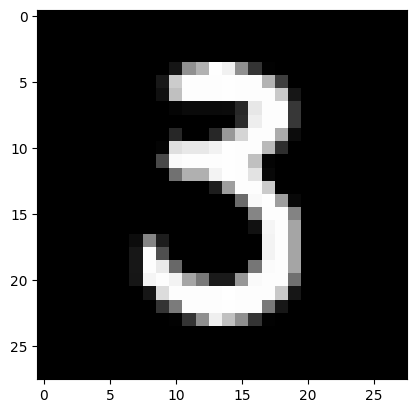

In [51]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)

In [52]:
dev_predictions = make_predictiopns(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 7 9 8 1 1 6 4 4 2 3 2 0 4 8 5 4 5 5 5 3 3 9 6 3 3 6 5 3 5 4 9 6 6 7 6 2
 7 3 2 8 1 2 7 0 9 0 7 3 4 3 8 0 1 4 7 8 4 7 5 8 9 3 4 5 8 3 8 2 7 2 4 9 6
 7 0 1 4 3 6 4 1 7 3 1 6 6 3 9 1 4 3 4 2 8 6 3 4 1 7 8 7 7 0 0 7 3 0 7 8 1
 5 6 1 7 8 7 9 8 3 4 6 4 2 9 5 4 6 3 8 5 6 8 9 1 0 8 2 9 2 7 7 2 7 2 7 7 9
 5 7 7 8 8 0 7 2 9 0 8 3 8 6 6 7 7 6 1 0 7 6 8 1 3 3 7 2 8 9 8 9 2 6 6 8 2
 1 1 0 9 0 3 1 2 7 5 4 8 0 6 0 8 8 6 9 7 8 0 8 9 5 6 5 1 0 8 1 9 8 2 7 8 1
 6 8 5 2 0 2 4 1 8 0 7 3 2 7 1 8 1 5 7 2 5 3 2 3 8 0 9 9 2 6 7 3 4 1 1 9 2
 2 9 6 5 6 9 9 3 9 1 1 0 7 9 3 9 9 7 9 6 9 6 3 5 1 3 4 8 6 6 3 7 1 1 3 8 1
 4 8 5 7 9 1 6 6 9 6 1 0 1 1 8 0 9 1 7 4 2 6 4 5 9 8 9 4 0 5 9 5 7 0 3 4 3
 7 8 3 5 5 6 0 1 7 1 9 3 2 3 0 7 2 1 9 8 1 2 8 0 4 3 0 2 4 1 3 6 2 0 9 1 0
 4 9 8 8 0 4 8 8 2 4 1 2 7 1 8 8 9 9 5 7 8 1 1 0 5 5 1 0 1 9 4 6 4 6 9 4 4
 4 5 5 9 1 7 8 0 0 5 1 0 8 7 7 1 3 0 4 2 1 9 5 2 1 0 5 0 1 1 0 0 9 9 3 8 6
 1 8 0 7 9 0 2 3 9 6 3 5 5 2 0 6 6 8 5 6 7 4 3 8 3 0 8 3 7 8 6 4 0 5 0 2 5
 0 4 5 0 8 1 9 8 3 1 7 3 

0.849